<h1> Capstone Project - The Battle of Neighborhoods </h1>

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

2. These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

1. Introduction where you discuss the business problem and who would be interested in this project.
2. Data where you describe the data that will be used to solve the problem and the source of the data.
3. Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
4. Results section where you discuss the results.
5. Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
6. Conclusion section where you conclude the report.

<h2> QN 1: Introduction of business project, target audience </h2>

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.


<h3> <b> Introduction & Background: </b> </h3>

New York City, which is often called as New York, is the most popular city in the USA, and also it is the most densely populated city in USA. New York City has been described as the cultural, financial and the media capital of the word, which significantly influence the commerce, entertainment, technology, financial of the world. 

With the population of almost 20 million people in its metropolitan statistical area, New York City can be described as one of the most competitive city of the world. Due to expensive rental fee and competitivity, thus the analysis and choice of location is essential for new business need to be carefully. 

In this assignment, we will investigate in New York City, how do we choose best location to open a restaurant and get the most benefit by using the Foursquare by providing the location data and venue information. As investigated, Italian familiies immigrated into the USA in the late 19th and 20th century. So with a huge population of immigration of Italians, they must need to find the restaurant which suitable for them. 

In this report, I will focus on exploring on the locations & which neighbourhood and boroughs of New York City have the most Italian restaurants that can suitable for the Italian immegrants' flavour. Moreover, I will investigate if I want to open an Italian restaurant, where should I open? 



<h3> <b> Target Audience:  </b> </h3>

This project/report aims to provide information and analysis to the New York City restaurant overview and analysis to business stakeholders who may want to invest and open a restaurant in New York. 

By looking through this report, business stakeholders will have a virtual overview on which location has the most restaurant and where is the best location for stakeholders to choose to open the restaurant. 

<h2> QN 2: Source of data </h2>

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

1. In order to obtain the basic background and information for New York City, information get from the website: https://en.wikipedia.org/wiki/New_York_City, where list out the basic history, population, location etc for stakeholders to get a overview of New York City
2. Since New York City has 5 boroughs, so in order to segment the neighborhoods and explore, we need to find the dataset which contains 5 boroughs and neighbourhoods as well within each borough. Latitude and Longtitude of each neighborhood are also needed in the dataset. The available link for this dataset is: https://geo.nyu.edu/catalog/nyu_2451_34572
3. The link which can directly download the dataset as mentioned in point 2: https://cocl.us/new_york_dataset
4. Foursquare API, which has the link of https://developer.foursquare.com/ will be used as well to investigate the dataset of New York City and neighbourhoods and then will use method of clustering to cluster those neighborhoods for Italian restaurants in order to get the detailed information.


<h2> QN 3: Explotary data analysis</h2>

Our goal of this project is to find the best location which suitable for opening Italian restaurant in New York City. 

Download and import dependencies we needed: 

In [1]:
import numpy as np # library to handle data in a vectorized manner
!pip install geopy
import geopy
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import folium
print("All libraries are imported.")

All libraries are imported.


<h3> Step 1: Download and explore dataset

Download the New York City dataset from the website https://cocl.us/new_york_dataset:

In [2]:
url='https://cocl.us/new_york_dataset'
resp1=requests.get(url).json()


Open new_york_dataset in json format:

In [3]:
with open('new-york-data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude and show 5 example rows of it:

In [4]:
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Check the shape of the new-york-data dataset:

In [5]:
neighborhoods.shape

(306, 4)

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Show them in a bar chart diagram format group by each borough and neighbourhood count: 

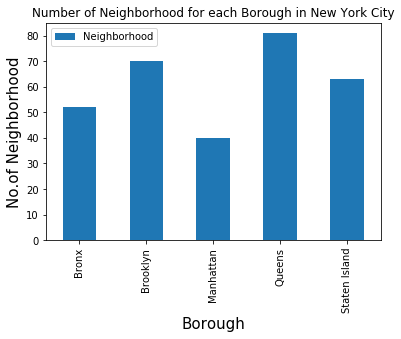

In [7]:
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Now from the diagram we can identify that Queens has the most number of neighborhood in New York City.
We want to find the location of NY and draw a map for it:

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

As in previous bar chart graph, Queens has the most neighbourhoods, so let us visulize the Queens neighbourhoods in the map: 

In [10]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


Geo-location of Queens:

In [11]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


Visualize the map of Queens: 

In [12]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

<h3> Step 2: Explore Neighbourhoods in Queens

Now we use foursquare to explore the detailed information of Queens and its neighbourhoods:

In [13]:
CLIENT_ID = '4HGENZGQUHSPVO3BGUU2Y4JKT23SV0IP3WOZLZCRQGPBNIPO' # your Foursquare ID
CLIENT_SECRET = 'WTFJXPF3FD10CRBUFRSRHA1ETJ205FG5P51ZNGUYK2TUHQZT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4HGENZGQUHSPVO3BGUU2Y4JKT23SV0IP3WOZLZCRQGPBNIPO
CLIENT_SECRET:WTFJXPF3FD10CRBUFRSRHA1ETJ205FG5P51ZNGUYK2TUHQZT


Now we show 5 of Queens neighbourhoods as example:

In [14]:
queens_data.loc[0:5, 'Neighborhood']

0            Astoria
1           Woodside
2    Jackson Heights
3           Elmhurst
4       Howard Beach
5             Corona
Name: Neighborhood, dtype: object

We show 5 Queens neigbourhoods location as example:

In [15]:
for index in range(0,5):
    neighborhood_latitude = queens_data.loc[index, 'Latitude'] # neighborhood latitude value
    neighborhood_longitude = queens_data.loc[index, 'Longitude'] # neighborhood longitude value

    neighborhood_name = queens_data.loc[index, 'Neighborhood'] # neighborhood name
    
    print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.
Latitude and longitude values of Woodside are 40.74634908860222, -73.90184166838284.
Latitude and longitude values of Jackson Heights are 40.75198138007367, -73.88282109164365.
Latitude and longitude values of Elmhurst are 40.744048505122024, -73.88165622288388.
Latitude and longitude values of Howard Beach are 40.65422527738487, -73.8381376460028.


Now we define the parameter of foursquare to get 50 neighbourhoods of Queens within 500m: 

In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4HGENZGQUHSPVO3BGUU2Y4JKT23SV0IP3WOZLZCRQGPBNIPO&client_secret=WTFJXPF3FD10CRBUFRSRHA1ETJ205FG5P51ZNGUYK2TUHQZT&v=20180605&ll=40.65422527738487,-73.8381376460028&radius=500&limit=100'

We test on foursquare URL and its response:

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f181313de20830ae2632841'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Old Howard Beach',
  'headerFullLocation': 'Old Howard Beach, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 35,
  'suggestedBounds': {'ne': {'lat': 40.65872528188487,
    'lng': -73.83221716558458},
   'sw': {'lat': 40.649725272884865, 'lng': -73.84405812642103}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4af23b33f964a520c9e621e3',
       'name': "Lenny's Clam Bar",
       'location': {'address': '16102 Crossbay Blvd',
        'crossStreet': 'at 161st Ave',
        'lat': 40.65574925807263,
       

Bring the 100 data into dataframe and show 5 as examples:

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lenny's Clam Bar,Seafood Restaurant,40.655749,-73.839004
1,Brothers Ravioli,Italian Restaurant,40.655282,-73.838991
2,Old Country Bagel,Bagel Shop,40.653484,-73.838576
3,Prima Pasta & Cafe,Italian Restaurant,40.654385,-73.839093
4,Carvel Ice Cream,Ice Cream Shop,40.652120,-73.838437


Number of neighbourhoods returned by foursquare:

In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

35 venues were returned by Foursquare.


Now expand the search area to 1000m:

In [21]:
def getNearbyVenues(names, latitudes, longtitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longtitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood of Queens and create a new dataframe called *queens_venue*.

In [22]:


queens_venue = getNearbyVenues(names=queens_data['Neighborhood'],
                               latitudes=queens_data['Latitude'],
                               longtitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


Format queens_venue into a dataframe: 

In [23]:
print(queens_venue.shape)
queens_venue.head()

(5276, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
2,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
3,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
4,Astoria,40.768509,-73.915654,Al-sham Sweets and Pastries,40.768077,-73.911561,Middle Eastern Restaurant


Let's check how many venues were returned for each neighborhood

In [24]:
queens_venue.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,36,36,36,36,36,36
Astoria,100,100,100,100,100,100
Astoria Heights,76,76,76,76,76,76
Auburndale,100,100,100,100,100,100
Bay Terrace,63,63,63,63,63,63
Bayside,100,100,100,100,100,100
Bayswater,10,10,10,10,10,10
Beechhurst,55,55,55,55,55,55
Bellaire,53,53,53,53,53,53


Unique venues in queens neighbourhood:

In [25]:
print('There are {} uniques categories.'.format(len(queens_venue['Venue Category'].unique())))

There are 338 uniques categories.


<h3> Step 3: Analyze neighbourhood in Queens

In [26]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Gym,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Climbing Spot,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ska

Size of queens_onehot dataframe:

In [27]:
queens_onehot.shape

(5276, 338)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped.head()

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Gym,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Climbing Spot,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ska

Find Italian restaurant allocation in Queens neighbourhood:

In [29]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [30]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_resturants_ny=pd.DataFrame(columns=column_names)
count=1
for row in queens_data.values.tolist():
    Borough, Neighborhood, Latitude, Longtitude=row
    venues = get_venues(Latitude,Longtitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_resturants_ny = italian_resturants_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

Italian Resturants in Astoria, Queens:3
Italian Resturants in Woodside, Queens:1
Italian Resturants in Jackson Heights, Queens:1
Italian Resturants in Elmhurst, Queens:0
Italian Resturants in Howard Beach, Queens:4
Italian Resturants in Corona, Queens:3
Italian Resturants in Forest Hills, Queens:2
Italian Resturants in Kew Gardens, Queens:1
Italian Resturants in Richmond Hill, Queens:1
Italian Resturants in Flushing, Queens:0
Italian Resturants in Long Island City, Queens:3
Italian Resturants in Sunnyside, Queens:1
Italian Resturants in East Elmhurst, Queens:1
Italian Resturants in Maspeth, Queens:2
Italian Resturants in Ridgewood, Queens:3
Italian Resturants in Glendale, Queens:1
Italian Resturants in Rego Park, Queens:1
Italian Resturants in Woodhaven, Queens:0
Italian Resturants in Ozone Park, Queens:2
Italian Resturants in South Ozone Park, Queens:1
Italian Resturants in College Point, Queens:0
Italian Resturants in Whitestone, Queens:6
Italian Resturants in Bayside, Queens:3
Itali

In [31]:
italian_resturants_ny.head()

,Borough,Neighborhood,ID,Name
0,Queens,Astoria,5010b169e4b05edd9983ec7d,Antika Restaurant & Pizzeria
1,Queens,Astoria,4ebf0e380aaf6450ba608920,Via Trenta
2,Queens,Astoria,53a60a88498ef405d8a78217,VITE vinosteria
3,Queens,Woodside,4bc11e07920eb713d6491a2c,Donato's Restaurant
4,Queens,Jackson Heights,4a82d6adf964a5206ff91fe3,Uncle Peter's


In [32]:
italian_resturants_ny.shape

(110, 4)

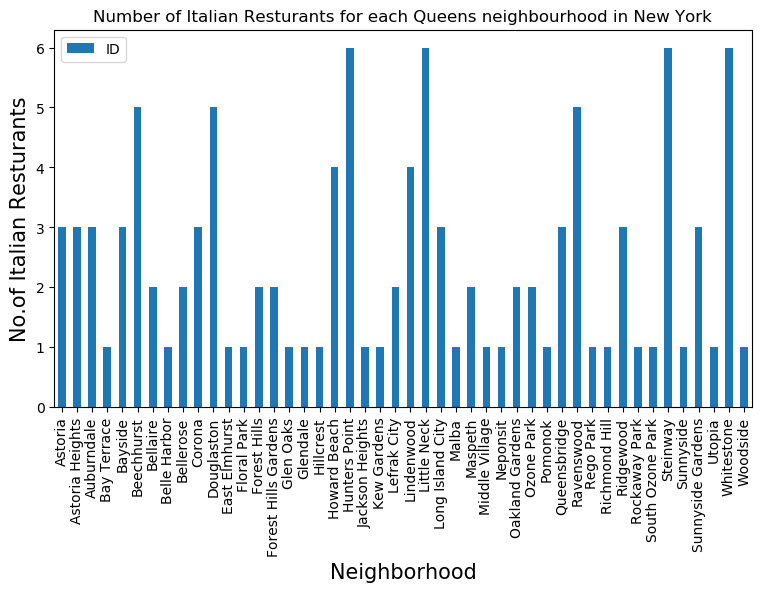

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Italian Resturants for each Queens neighbourhood in New York')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_resturants_ny.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


Now from the graph we can identify Hunters Point has the most Italian restaurants in Queens

<h3> Step 4: Analyze Italian restaurants in Queens

Find the Italian restaurant list in Hunters Point:

In [34]:
italian_resturants_ny[italian_resturants_ny['Neighborhood']=='Hunters Point']

,Borough,Neighborhood,ID,Name
96,Queens,Hunters Point,463220f3f964a520fb451fe3,Manetta's Ristorante
97,Queens,Hunters Point,4a1a3f6df964a5208b7a1fe3,Bella Via
98,Queens,Hunters Point,49f5bf5ef964a520b46b1fe3,Manducatis Rustica
99,Queens,Hunters Point,556fb3b4498e61f524e70951,Maiella
100,Queens,Hunters Point,4f74ff83e4b09b101271b89b,Manducatis
101,Queens,Hunters Point,53ed8f36498ea1eca81563c1,Il Falco


However, we want to analyze the overall Queens Italian restaurants rating and likes:

In [35]:
def get_venue_details(venue_id):
    CLIENT_ID = '4TNA3RGQ4ZD1SOKVHT2MYBIMO20C1PW52M5GA14RLXUQO5MB' # your Foursquare ID
    CLIENT_SECRET = 'JLWMKWX4NG4TL3FFBFMKWHS3KZ4UTTUMDNXSQ0TMRYSAQO1L' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [36]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_details_ny=pd.DataFrame(columns=column_names)
count=1


for row in italian_resturants_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    italian_rest_details_ny = italian_rest_details_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                          Name  Likes  Rating  Tips
0  5010b169e4b05edd9983ec7d  Antika Restaurant & Pizzeria     72     8.2    31
                         ID        Name  Likes  Rating  Tips
0  4ebf0e380aaf6450ba608920  Via Trenta     57     7.7    28
                         ID             Name  Likes  Rating  Tips
0  53a60a88498ef405d8a78217  VITE vinosteria    106     8.8    30
                         ID                 Name  Likes  Rating  Tips
0  4bc11e07920eb713d6491a2c  Donato's Restaurant     23     7.2     9
                         ID           Name  Likes  Rating  Tips
0  4a82d6adf964a5206ff91fe3  Uncle Peter's     42     8.9    11
                         ID              Name  Likes  Rating  Tips
0  4bae3bd0f964a52009963be3  Brothers Ravioli     10     8.1     2
                         ID                Name  Likes  Rating  Tips
0  4bafdb5df964a52086263ce3  Prima Pasta & Cafe     35     7.7    17
                         ID                     

KeyError: 'venue'

Show it in a more neatly format:

In [37]:
italian_rest_details_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Queens,Astoria,5010b169e4b05edd9983ec7d,Antika Restaurant & Pizzeria,72,8.2,31
1,Queens,Astoria,4ebf0e380aaf6450ba608920,Via Trenta,57,7.7,28
2,Queens,Astoria,53a60a88498ef405d8a78217,VITE vinosteria,106,8.8,30
3,Queens,Woodside,4bc11e07920eb713d6491a2c,Donato's Restaurant,23,7.2,9
4,Queens,Jackson Heights,4a82d6adf964a5206ff91fe3,Uncle Peter's,42,8.9,11
5,Queens,Howard Beach,4bae3bd0f964a52009963be3,Brothers Ravioli,10,8.1,2
6,Queens,Howard Beach,4bafdb5df964a52086263ce3,Prima Pasta & Cafe,35,7.7,17
7,Queens,Howard Beach,4e6409451495676d566f10b5,Bruno Ristorante Italianio,29,8.7,7
8,Queens,Howard Beach,4ba148f5f964a5201da937e3,Roma View Catering,16,7.0,3
9,Queens,Corona,4b808501f964a5207b7930e3,Park Side,187,8.7,78


In [38]:
italian_rest_details_ny.shape

(50, 7)

In [39]:
italian_rest_details_ny.dtypes

Borough          object
Neighborhood     object
ID               object
Name             object
Likes            object
Rating          float64
Tips             object
dtype: object

Now we convert data types of Likes to be float:

In [40]:
italian_rest_details_ny['Likes']=italian_rest_details_ny['Likes'].astype('float64')

We convert data types of Tips to be float as well:

In [41]:
italian_rest_details_ny['Tips']=italian_rest_details_ny['Tips'].astype('float64')

Now we want to find the Italian restaurant with most Likes in Queens:

In [42]:
italian_rest_details_ny.iloc[italian_rest_details_ny['Likes'].idxmax()]

Borough                           Queens
Neighborhood                      Corona
ID              4b808501f964a5207b7930e3
Name                           Park Side
Likes                                187
Rating                               8.7
Tips                                  78
Name: 9, dtype: object

From the data shows above, we can indicate that Park Side is the one which has the most Likes by customers.

Now we want to find the Italian restaurant with highest Rating in Queens:

In [43]:
italian_rest_details_ny.iloc[italian_rest_details_ny['Rating'].idxmax()]

Borough                           Queens
Neighborhood                   Sunnyside
ID              555d29f7498eb6112f44ecac
Name                            SoleLuna
Likes                                119
Rating                               9.1
Tips                                  26
Name: 19, dtype: object

From the data shows above, we can indicate that SoleLuna is the one which has the highest rating by customers.

Now we want to find out the Italian restaurant with most number of Tips in Queens:

In [44]:
italian_rest_details_ny.iloc[italian_rest_details_ny['Tips'].idxmax()]

Borough                           Queens
Neighborhood                      Corona
ID              4b808501f964a5207b7930e3
Name                           Park Side
Likes                                187
Rating                               8.7
Tips                                  78
Name: 9, dtype: object

From the data shows above, we can indicate that Park Side is the one which has the most tips.

Now we want to analyze average rating of Italian restaurant based on every neighborhood in Queens:

In [45]:
queens_neighborhood_average=italian_rest_details_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
queens_neighborhood_average.columns=['Neighborhood','Average Rating']

In [46]:
queens_neighborhood_average.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
19,Sunnyside,9.100000
9,Jackson Heights,8.900000
15,Rego Park,8.500000
0,Astoria,8.233333
18,South Ozone Park,8.200000
8,Howard Beach,7.875000
12,Long Island City,7.833333
6,Forest Hills,7.800000
17,Ridgewood,7.633333
2,Bayside,7.400000


Now let us visualize it using bar chart:

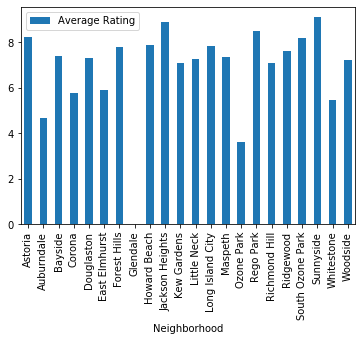

In [47]:
queens_neighborhood_average.groupby('Neighborhood').mean().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

From the bar chart we can analyze that it display/shows the same as table format.

Now let us filter out Italian restaurants in which neighborhoods have rating >= 8.5:

In [48]:
queens_neighborhoods_average_filter=queens_neighborhood_average[queens_neighborhood_average['Average Rating']>=8.5]
queens_neighborhoods_average_filter

,Neighborhood,Average Rating
9,Jackson Heights,8.9
15,Rego Park,8.5
19,Sunnyside,9.1


<h3> Step 5: Conclusion

Some findings and analysis after done the assignment:
    1. Queens has the most neighborhoods among all 5 borough in New York City. 
    2. Hunters Point has the most Italian restaurant in Queens.
    3. Park Side - Corona is the one which has the most LIKES by customers in Queens.
    4. SoleLuna - Sunnyside has the highest RATING by customers in Queens.
    5. Park Side - Corona has the most TIPS by customers in Queens.
    6. Overall in Queens, Sunnyside has the highest average rating regards of Italian restaurants.
    